In [1]:
import pandas as pd
import geopandas
import geoplot
import matplotlib as plt
from matplotlib import cm
import numpy as np

In [2]:
# Load dataset
# Source: Global Health Estimates 2016: Deaths by Cause, Age, Sex, by Country and by Region, 2000-2016. Geneva, World Health Organization; 2018
# https://www.who.int/healthinfo/global_burden_disease/estimates/en/ (http://terrance.who.int/mediacentre/data/ghe/)
data = pd.read_csv('ghe2016_deaths_country_allages.csv', sep=',')

In [3]:
data.describe()

,cause2015,age,dths2000,low2000,upp2000,dths2001,low2001,upp2001,dths2002,low2002,...,upp2013,dths2014,low2014,upp2014,dths2015,low2015,upp2015,dths2016,low2016,upp2016
count,118035.00000,118035.0,1.180350e+05,1.180350e+05,1.180350e+05,1.180350e+05,1.180350e+05,1.180350e+05,1.180350e+05,1.180350e+05,...,1.180350e+05,1.180350e+05,1.180350e+05,1.180350e+05,1.180350e+05,1.180350e+05,1.180350e+05,1.180350e+05,1.180350e+05,1.180350e+05
mean,833.92093,99.0,3.683422e+03,3.173491e+03,4.301582e+03,3.700248e+03,3.189723e+03,4.317274e+03,3.724552e+03,3.214917e+03,...,4.551697e+03,3.905417e+03,3.339584e+03,4.598482e+03,3.946440e+03,3.364319e+03,4.663934e+03,3.988479e+03,3.391114e+03,4.729811e+03
std,446.29961,0.0,6.459841e+04,5.989612e+04,6.985196e+04,6.496136e+04,6.023784e+04,7.023121e+04,6.528115e+04,6.055216e+04,...,7.914510e+04,7.343533e+04,6.723490e+04,8.037103e+04,7.424643e+04,6.777642e+04,8.151738e+04,7.570902e+04,6.898247e+04,8.330959e+04
min,0.00000,99.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,510.00000,99.0,1.544789e-02,0.000000e+00,3.061806e-02,1.561284e-02,0.000000e+00,3.000205e-02,1.484348e-02,0.000000e+00,...,1.995321e-02,9.081082e-03,0.000000e+00,1.996987e-02,9.841178e-03,0.000000e+00,2.142083e-02,1.562063e-02,0.000000e+00,3.247050e-02
50%,820.00000,99.0,1.763407e+01,1.129520e+01,2.605341e+01,1.770225e+01,1.130787e+01,2.605305e+01,1.784012e+01,1.136500e+01,...,2.909472e+01,1.954492e+01,1.227764e+01,2.960159e+01,1.978191e+01,1.222576e+01,3.001084e+01,1.987926e+01,1.218557e+01,3.053111e+01
75%,1232.00000,99.0,2.704597e+02,1.921493e+02,3.743464e+02,2.722125e+02,1.927556e+02,3.757127e+02,2.749190e+02,1.946468e+02,...,4.181688e+02,3.007855e+02,2.098605e+02,4.254051e+02,3.053129e+02,2.112171e+02,4.329549e+02,3.076470e+02,2.109949e+02,4.377085e+02
max,1630.00000,99.0,9.179692e+06,8.846685e+06,9.528530e+06,9.260672e+06,8.924700e+06,9.612577e+06,9.271561e+06,8.935190e+06,...,1.035800e+07,1.003824e+07,9.552516e+06,1.053935e+07,1.013983e+07,9.625120e+06,1.067078e+07,1.037267e+07,9.846030e+06,1.091578e+07


In [4]:
# For each country, what is the breakdown of the main causes of death?
# We restrict to the top-level cause categories:
# 0 = All causes
# 10 = Communicable, maternal, perinatal and nutritional conditions
# 600 = Noncommunicable diseases
# 1510 = Injuries
# without distinguishing by sex
data1 = data[(data.cause2015.isin([0,10,600,1510])) & (data.sex=='BTSX')].filter(['iso3','cause2015','dths2016'],axis=1)
data1 = data1.pivot_table('dths2016','iso3','cause2015')

In [5]:
data1.head()

cause2015,0,10,600,1510
iso3,,,,
AFG,248220.078125,90307.523438,109527.648438,48384.902344
AGO,225708.375000,143024.343750,61862.476562,20821.523438
ALB,26085.128906,750.576172,24279.441406,1055.111450
ARE,15095.360352,973.953491,11585.883789,2535.522217
ARG,327980.812500,52181.531250,254483.875000,21315.414062


In [6]:
# We would now like to visualize our data as a colored world map (choropleth)
# We use an existing geopandas map
world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)
# which we slightly adjust
world.drop(['pop_est','gdp_md_est'],axis=1,inplace=True)
world.rename(columns={'iso_a3':'iso3'},inplace=True)

In [7]:
# We merge our data
world = pd.merge(world, data1, on='iso3')

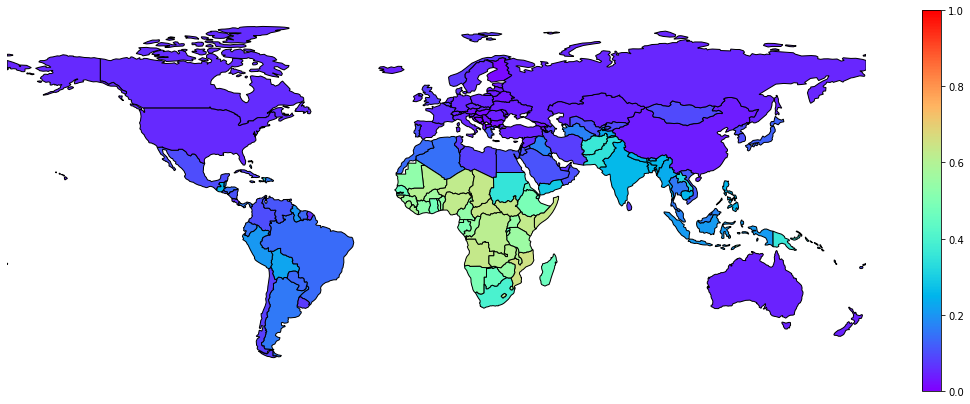

In [8]:
# We first visualize percentage for cause 10 (Communicable, maternal, perinatal and nutritional conditions)
# We normalize color map to keep it consistent across the three world maps
geoplot.choropleth(
    world, hue=world[10]/world[0],
    cmap='rainbow', figsize=(20, 7),
    legend=True, norm=plt.colors.Normalize(vmin=0.0, vmax=1.0)
)

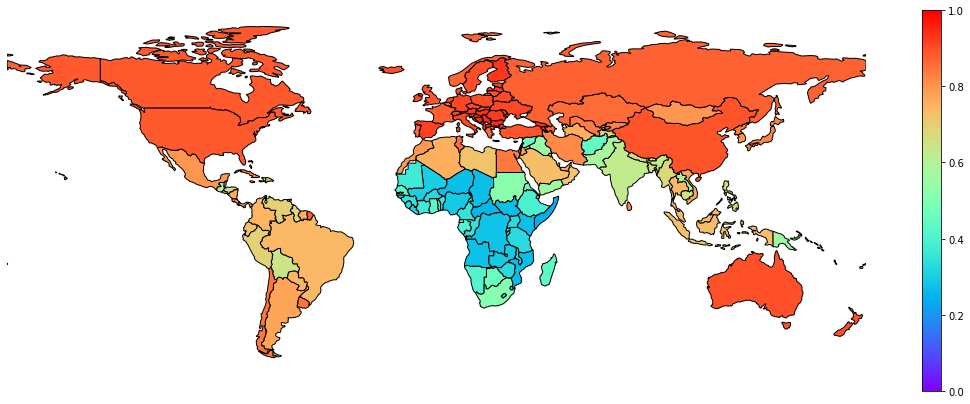

In [9]:
# We repeat the same for cause 600 (Noncommunicable diseases)...
geoplot.choropleth(
    world, hue=world[600]/world[0],
    cmap='rainbow', figsize=(20, 7),
    legend=True, norm=plt.colors.Normalize(vmin=0.0, vmax=1.0)
)

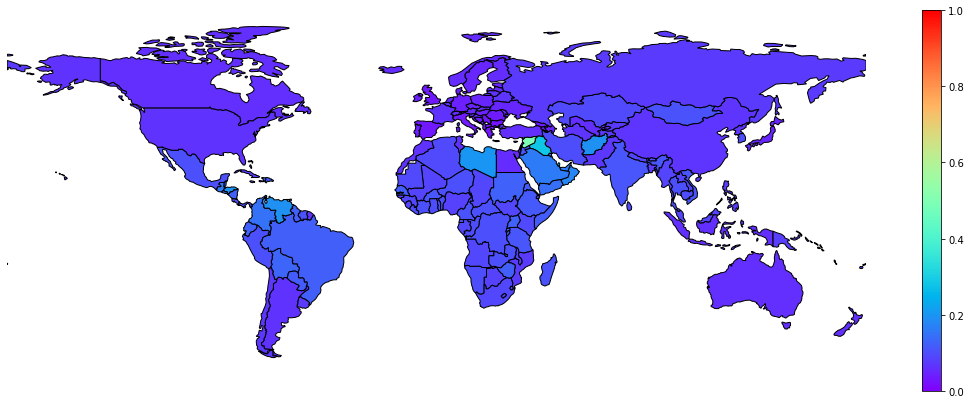

In [10]:
# ... then for cause 1510 (Injuries)
geoplot.choropleth(
    world, hue=world[1510]/world[0],
    cmap='rainbow', figsize=(20, 7),
    legend=True, norm=plt.colors.Normalize(vmin=0.0, vmax=1.0)
)

In [11]:
# How did this evolve between 2000 and 2016?
# We now restrict our selection to level-2 causes, still without distinguishing by sex
# We first select data for 2016...
data2 = data[(data.cause2015.isin([20,380,420,490,540,610,790,800,810,820,940,1020,1100,
                                   1170,1210,1260,1330,1340,1400,1470,1505,1520,1600]))
             & (data.sex=='BTSX')].filter(['iso3','causename','dths2016'],axis=1)
data2 = data2.pivot_table('dths2016','iso3','causename')
data2['first'] = data2.idxmax(axis=1)

In [12]:
data2.head()

causename,Cardiovascular diseases,Congenital anomalies,Diabetes mellitus,Digestive diseases,"Endocrine, blood, immune disorders",Genitourinary diseases,Infectious and parasitic diseases,Intentional injuries,Malignant neoplasms,Maternal conditions,...,Nutritional deficiencies,Oral conditions,Other neoplasms,Respiratory diseases,Respiratory infections,Sense organ diseases,Skin diseases,Sudden infant death syndrome,Unintentional injuries,first
iso3,,,,,,,,,,,,,,,,,,,,,
AFG,51243.871094,6310.233398,7056.362305,5469.718262,1649.537842,5540.962891,29663.634766,31537.939453,19964.783203,3527.494873,...,718.092957,0.000000,1091.670410,6714.860352,17108.451172,0.000000,118.307175,417.522522,16846.953125,Cardiovascular diseases
AGO,22541.433594,7160.586914,2378.603027,8646.000977,1627.093506,1781.712158,76576.890625,4188.373047,8455.342773,3398.926270,...,7213.908691,0.000000,444.139252,3602.460938,24106.341797,0.000000,873.542725,563.589478,16633.150391,Infectious and parasitic diseases
ALB,14930.169922,153.487778,167.899536,550.887451,117.050987,480.606293,142.651489,305.984344,5138.362305,8.142229,...,6.155376,0.000000,302.783875,886.713806,431.427795,0.000000,7.335886,13.343925,749.127197,Cardiovascular diseases
ARE,5970.003906,255.019119,706.976013,443.529572,126.991699,744.283875,293.663940,608.665527,1803.058350,5.471249,...,35.894127,0.000000,11.452223,825.200012,355.268127,0.000000,29.016478,16.722477,1926.856567,Cardiovascular diseases
ARG,91028.500000,2916.995117,9232.674805,17366.644531,3551.603271,14732.984375,13865.248047,6770.049805,65657.453125,421.797119,...,1722.472900,14.656195,3019.034668,34424.773438,32711.714844,2.314754,2258.536621,234.319824,14545.365234,Cardiovascular diseases


In [13]:
# ... then for 2016
data2b = data[(data.cause2015.isin([20,380,420,490,540,610,790,800,810,820,940,1020,1100,
                                   1170,1210,1260,1330,1340,1400,1470,1505,1520,1600]))
              & (data.sex=='BTSX')].filter(['iso3','causename','dths2000'],axis=1)
data2b = data2b.pivot_table('dths2000','iso3','causename')
data2b['first2000'] = data2b.idxmax(axis=1)

In [14]:
data2b.head()

causename,Cardiovascular diseases,Congenital anomalies,Diabetes mellitus,Digestive diseases,"Endocrine, blood, immune disorders",Genitourinary diseases,Infectious and parasitic diseases,Intentional injuries,Malignant neoplasms,Maternal conditions,...,Nutritional deficiencies,Oral conditions,Other neoplasms,Respiratory diseases,Respiratory infections,Sense organ diseases,Skin diseases,Sudden infant death syndrome,Unintentional injuries,first2000
iso3,,,,,,,,,,,,,,,,,,,,,
AFG,33426.910156,5123.980469,2975.072021,3696.515137,1116.627686,3231.382812,67082.507812,10809.649414,11472.527344,9645.051758,...,904.555664,0.0,396.566345,4390.898438,25476.230469,0.0,51.320728,634.542175,13104.968750,Infectious and parasitic diseases
AGO,19888.175781,6560.967773,1460.855347,8536.405273,1662.666016,1513.843384,117810.656250,5476.770020,4986.898926,7810.683105,...,11765.602539,0.0,171.090027,3609.651855,40812.765625,0.0,411.764252,459.212036,15281.565430,Infectious and parasitic diseases
ALB,9939.763672,313.885895,141.434341,424.345306,98.109413,366.984863,246.854080,356.472839,3744.184814,14.743132,...,21.032766,0.0,163.659821,823.610291,726.562988,0.0,4.966446,26.388836,1248.476685,Cardiovascular diseases
ARE,2301.092529,195.041901,245.165268,159.676193,60.596676,279.203217,186.298615,316.871490,473.479218,4.325009,...,23.250088,0.0,1.925839,318.689240,178.673859,0.0,9.924290,14.060050,779.463928,Cardiovascular diseases
ARG,93129.265625,3722.253662,9825.163086,12287.921875,2747.567139,8182.370605,13896.140625,6309.356445,59033.039062,448.368744,...,2008.866089,0.0,2391.722656,30828.142578,12208.128906,0.0,564.647400,362.487183,13655.845703,Cardiovascular diseases


In [15]:
# Then we merge with world map data
world = pd.merge(world, data2['first'], on='iso3')
world = pd.merge(world, data2b['first2000'], on='iso3')

In [16]:
# We add a new column representing 2016 and 2000 causes in the same field
world['firstevo'] = world['first'] + ' (' + world['first2000'] + ')'

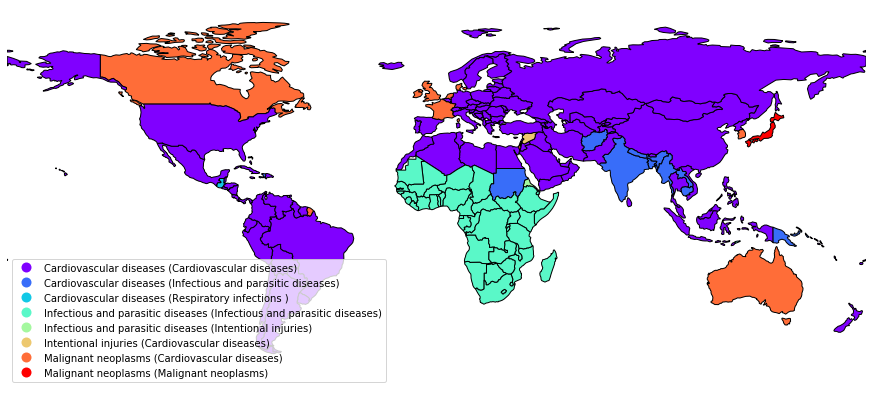

In [17]:
# We can now draw the world map; compared to the previous ones, this one has 8 discrete categories
# instead of a continuous scale
geoplot.choropleth(
    world, hue=world['firstevo'],
    cmap='rainbow', figsize=(20, 7),
    k=8, legend=True
)

In [18]:
# How does one’s sex influence cause of death?
# We  restrict our selection to same causes as above, and females first; we only keep total for all countries
data3 = data[(data.cause2015.isin([20,380,420,490,540,610,790,800,810,820,940,1020,1100,
                                   1170,1210,1260,1330,1340,1400,1470,1505,1520,1600]))
             & (data.sex=='FMLE')].filter(['iso3','causename','dths2016'],axis=1)
data3 = data3.pivot_table('dths2016','causename','iso3')
data3 = data3.sum(axis=1)
data3 = data3/data3.sum()

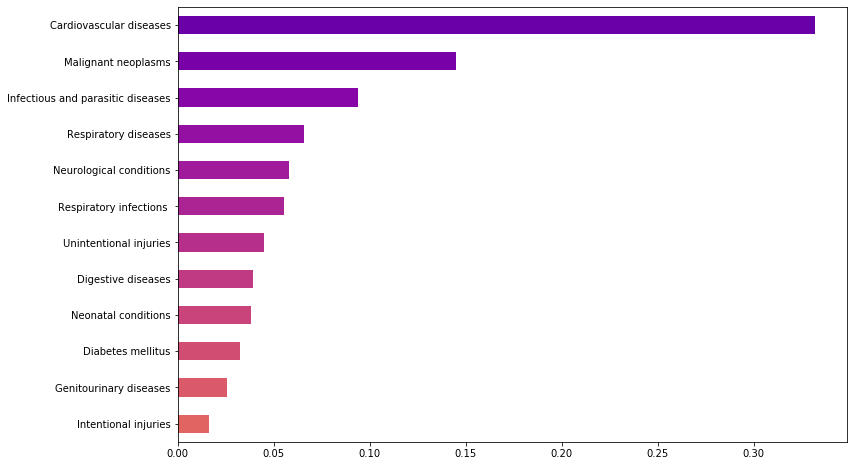

In [19]:
# The following trick allows to have a better looking graph
# https://stackoverflow.com/questions/11927715/how-to-give-a-pandas-matplotlib-bar-graph-custom-colors
color = cm.plasma_r(np.linspace(.4, .8, 12))
# We keep the 12 most important types
data3.nlargest(12).sort_values().plot(kind="barh",color=color,figsize=(12,8)).yaxis.label.set_visible(False)

In [20]:
# We now repeat the same for males
data3b = data[(data.cause2015.isin([20,380,420,490,540,610,790,800,810,820,940,1020,1100,
                                   1170,1210,1260,1330,1340,1400,1470,1505,1520,1600]))
              & (data.sex=='MLE')].filter(['iso3','causename','dths2016'],axis=1)
data3b = data3b.pivot_table('dths2016','causename','iso3')
data3b = data3b.sum(axis=1)
data3b = data3b/data3b.sum()

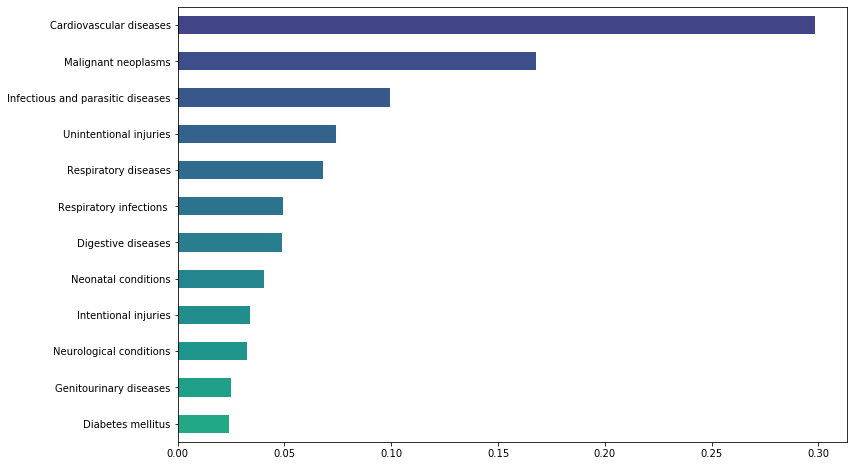

In [21]:
# Same trick as before but with a different colormap
# https://stackoverflow.com/questions/11927715/how-to-give-a-pandas-matplotlib-bar-graph-custom-colors
color = cm.viridis_r(np.linspace(.4, .8, 12))
data3b.nlargest(12).sort_values().plot(kind="barh",color=color,figsize=(12,8)).yaxis.label.set_visible(False)